In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
df = pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [63]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [65]:
duplicate_rows = df[df.duplicated()]
number_of_duplicates = len(duplicate_rows)
print(number_of_duplicates)

0


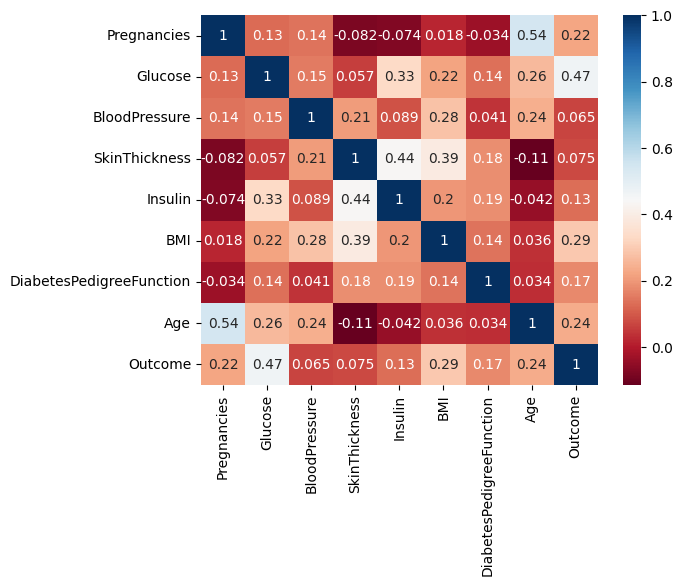

In [66]:
sns.heatmap(df.corr(), annot=True,cmap='RdBu')
plt.show()

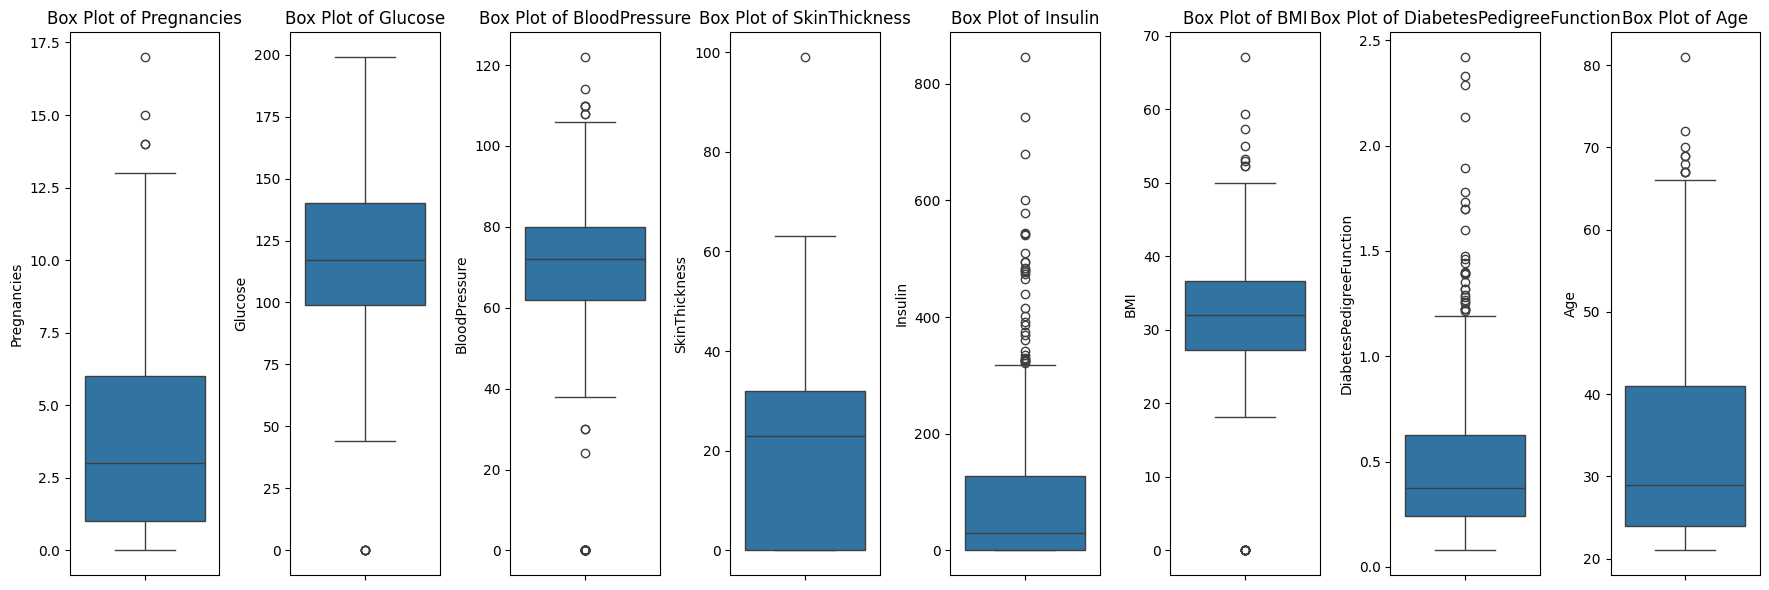

In [67]:
df = df.copy()
columns = ['Pregnancies','Glucose','BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']

plt.figure(figsize=(20, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 9, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [68]:
df=df.copy()
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df[column + '_outlier_iqr'] = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
    return df


def remove_outliers(df, column):
    return df[~df[column + '_outlier_iqr']]




In [69]:
def process_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        if col in df_cleaned.columns:
            df_cleaned = identify_outliers_iqr(df_cleaned, col)
            df_cleaned = remove_outliers(df_cleaned, col)
            num_outliers = df_cleaned[col + '_outlier_iqr'].sum()  # Use col here
            print(f"Number of outliers in {col} using IQR: {num_outliers}")
    return df_cleaned
df_cleaned = process_outliers(df, columns)

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape after removing outliers: {df_cleaned.shape}")

Number of outliers in Pregnancies using IQR: 0
Number of outliers in Glucose using IQR: 0
Number of outliers in BloodPressure using IQR: 0
Number of outliers in SkinThickness using IQR: 0
Number of outliers in Insulin using IQR: 0
Number of outliers in BMI using IQR: 0
Number of outliers in DiabetesPedigreeFunction using IQR: 0
Number of outliers in Age using IQR: 0
Original DataFrame shape: (768, 9)
Cleaned DataFrame shape after removing outliers: (636, 17)


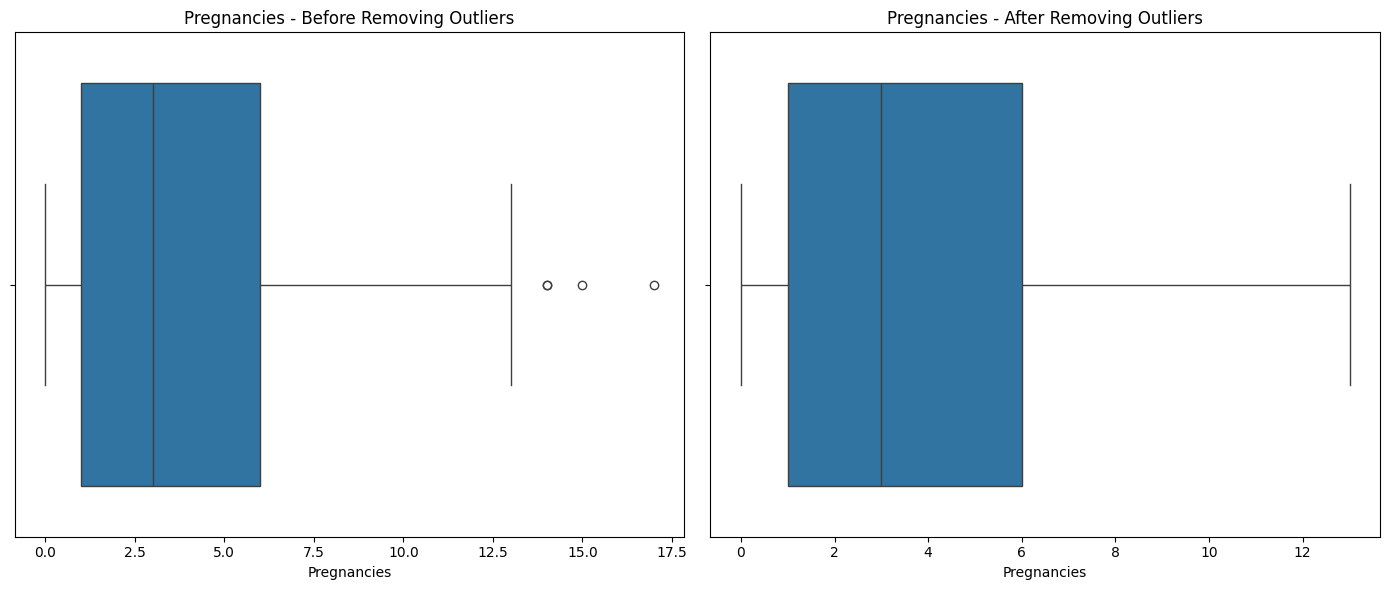

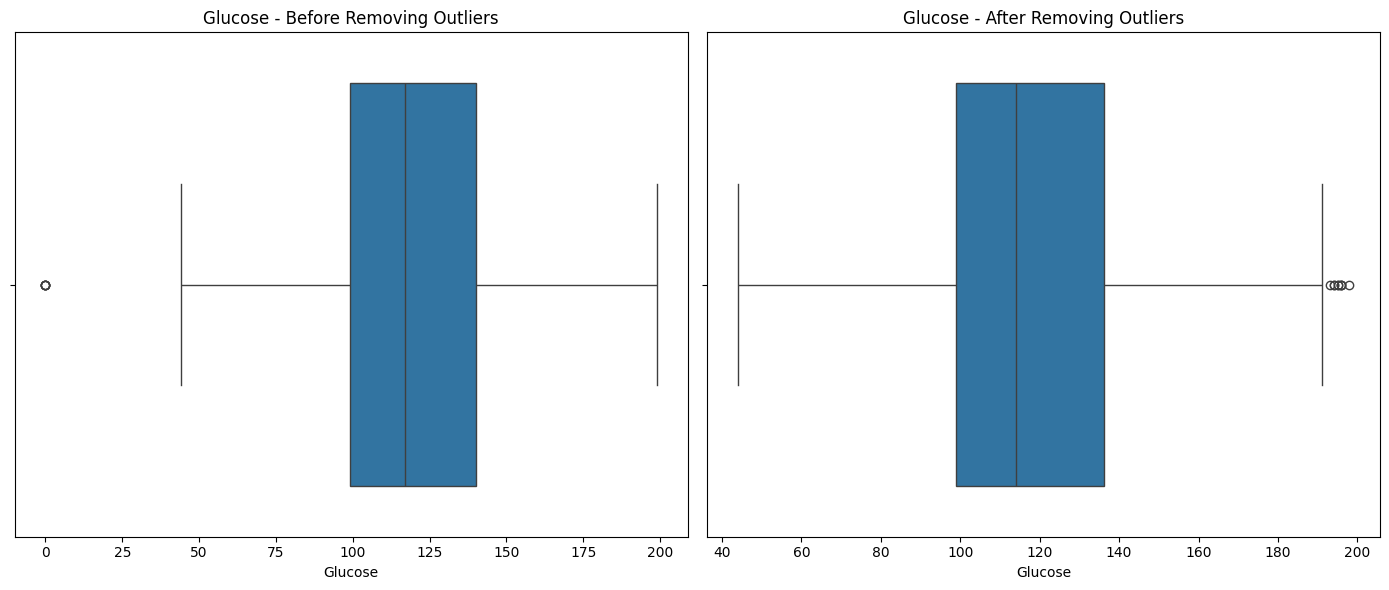

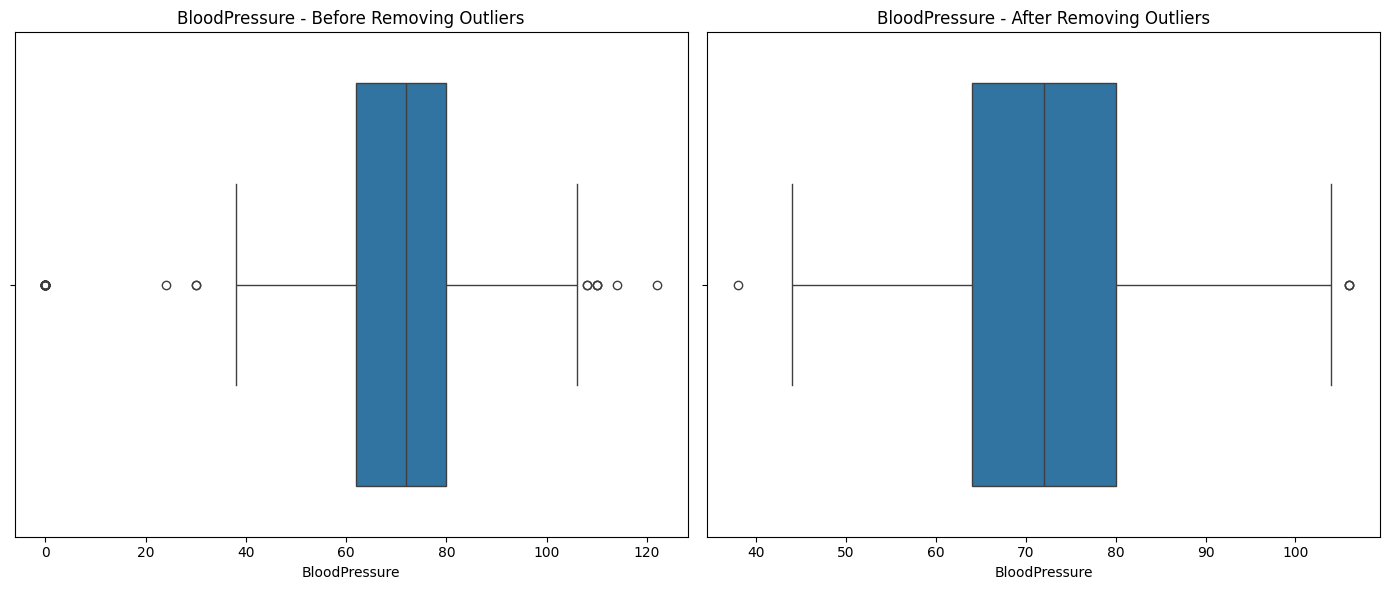

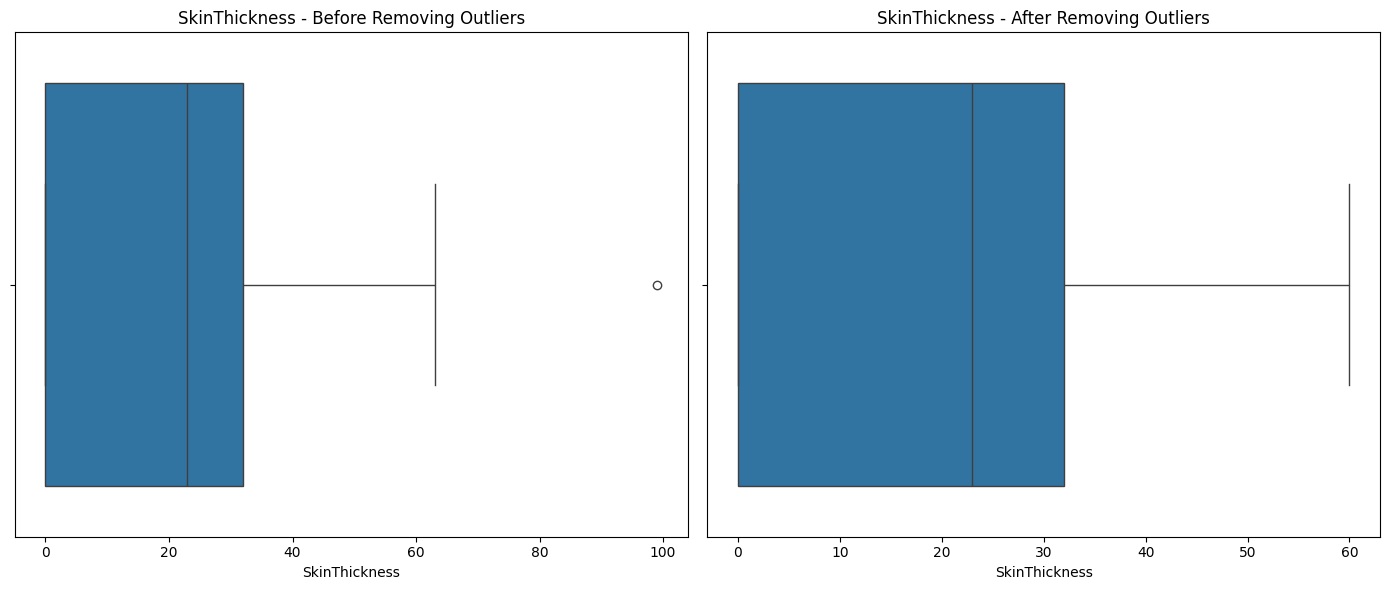

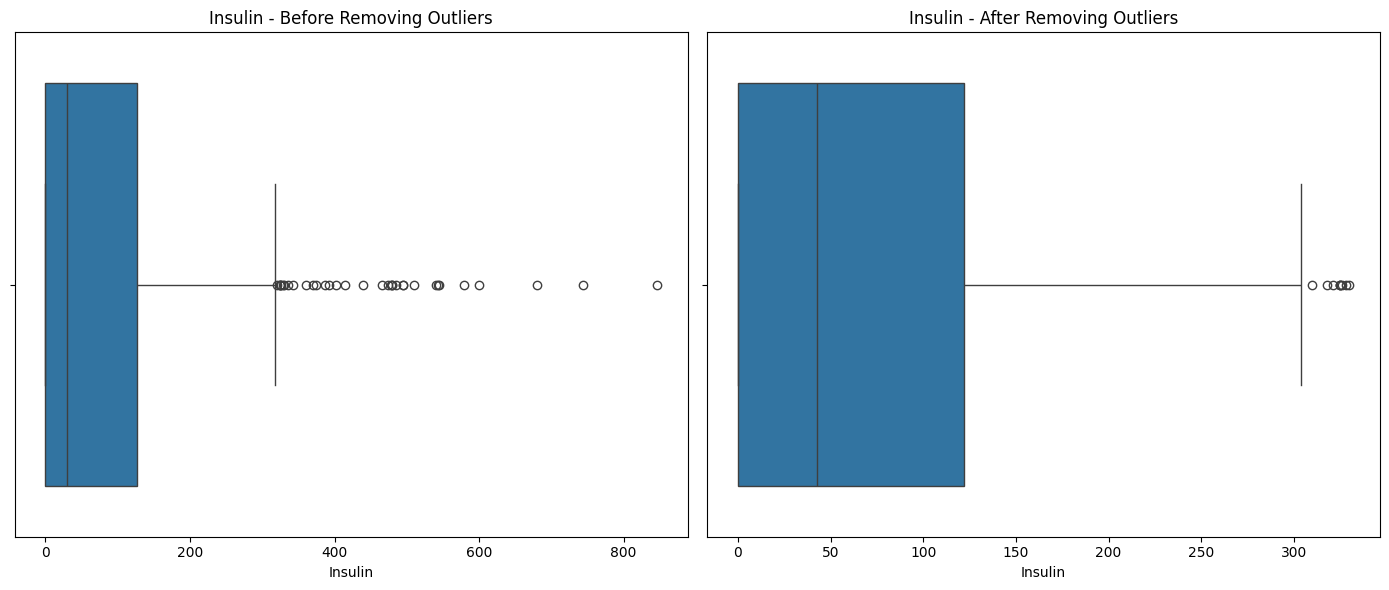

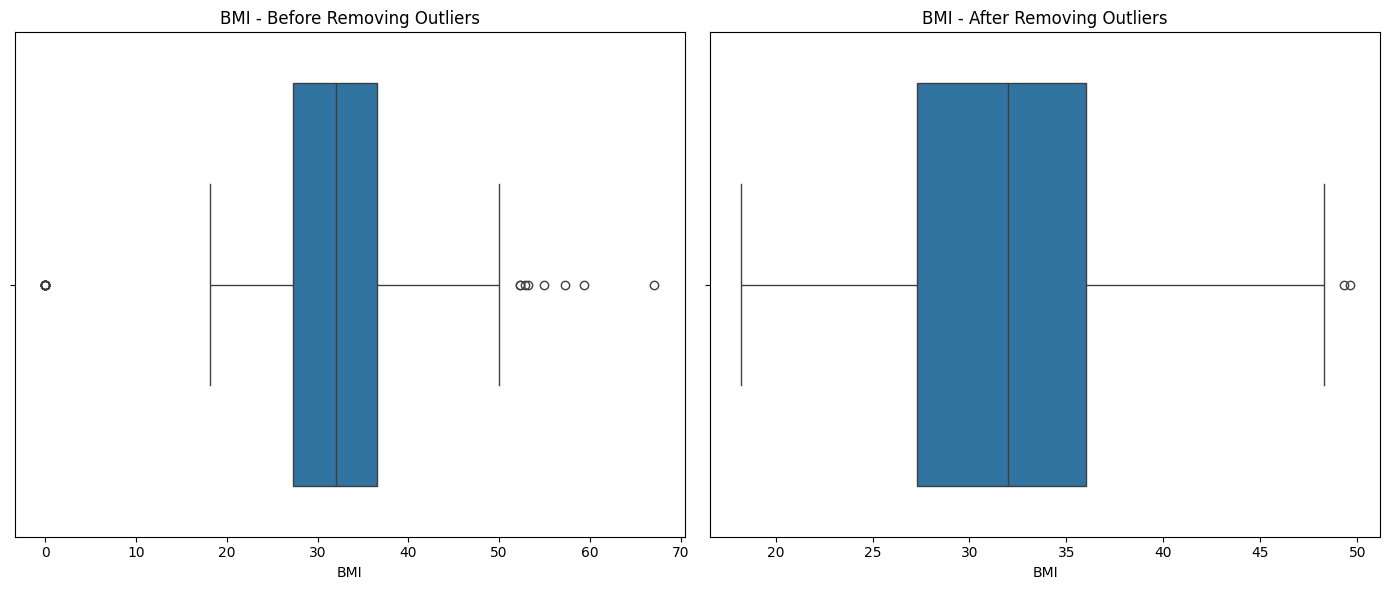

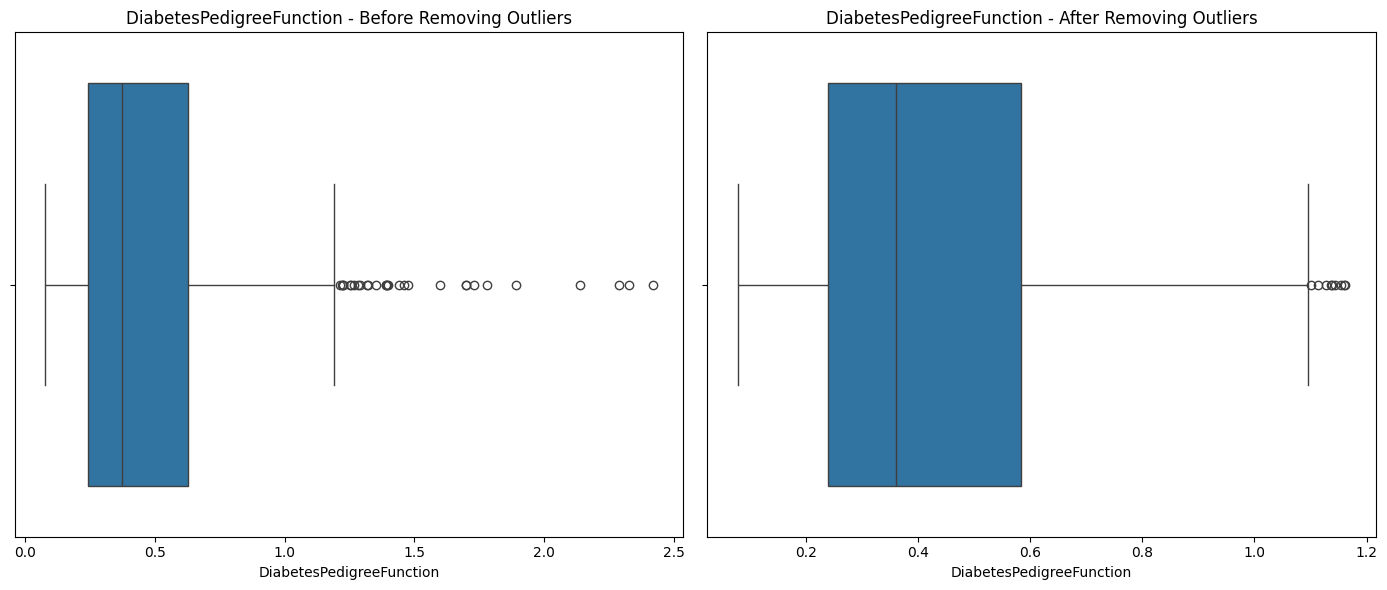

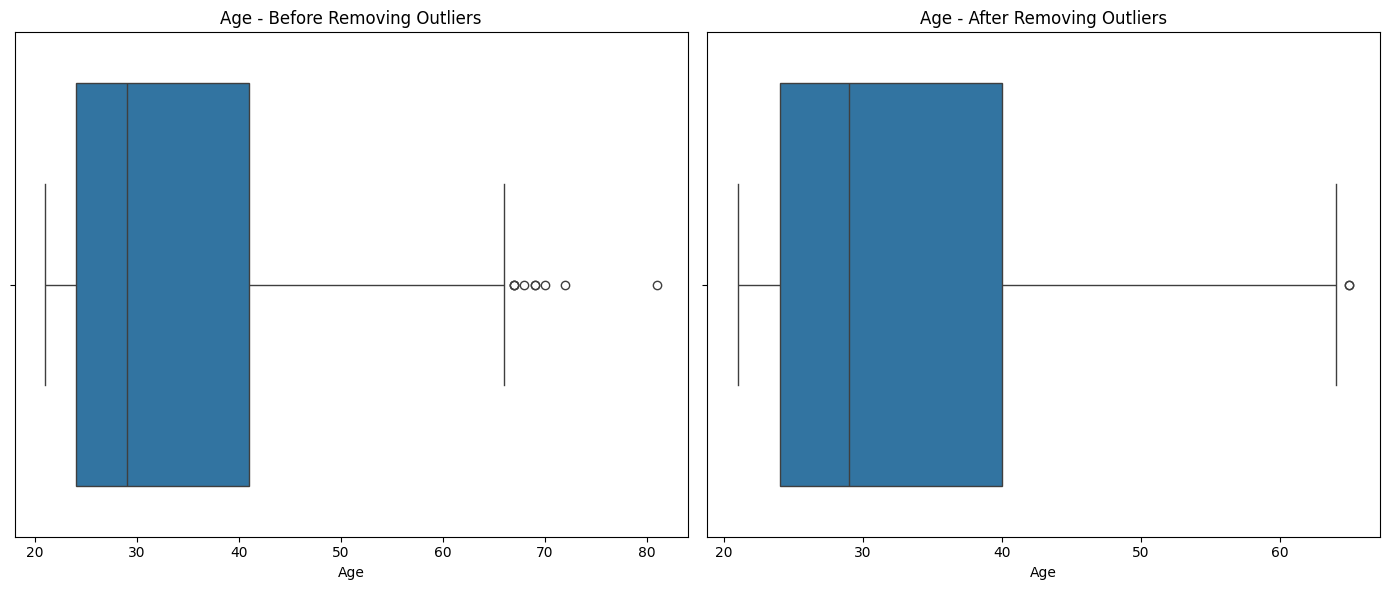

In [70]:

def plot_box_plots(df, cleaned_df, column):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column].dropna())
    plt.title(f'{column} - Before Removing Outliers')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_df[column].dropna())
    plt.title(f'{column} - After Removing Outliers')

    plt.tight_layout()
    plt.show()


for col in columns:
    if col in df.columns:
        plot_box_plots(df, df_cleaned, col)

In [71]:
df_update=df_cleaned.copy()
df_update

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_outlier_iqr,Glucose_outlier_iqr,BloodPressure_outlier_iqr,SkinThickness_outlier_iqr,Insulin_outlier_iqr,BMI_outlier_iqr,DiabetesPedigreeFunction_outlier_iqr,Age_outlier_iqr
0,6,148,72,35,0,33.6,0.627,50,1,False,False,False,False,False,False,False,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,False,False,False,False,False,False
2,8,183,64,0,0,23.3,0.672,32,1,False,False,False,False,False,False,False,False
3,1,89,66,23,94,28.1,0.167,21,0,False,False,False,False,False,False,False,False
5,5,116,74,0,0,25.6,0.201,30,0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,False,False,False,False,False,False,False,False
764,2,122,70,27,0,36.8,0.340,27,0,False,False,False,False,False,False,False,False
765,5,121,72,23,112,26.2,0.245,30,0,False,False,False,False,False,False,False,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,False,False,False,False,False,False


In [72]:
df_update['Outcome'].value_counts()

,count
Outcome,
0,439
1,197


In [78]:

from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


X = df_update.drop('Outcome', axis=1)
y = df_update['Outcome']

undersample = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = undersample.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Outcome'] = y_resampled
df_resampled['Outcome'].value_counts()





,count
Outcome,
0,197
1,197


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC-ROC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC-ROC Score: {auc_score:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67        68
           1       0.58      0.75      0.66        51

    accuracy                           0.66       119
   macro avg       0.67      0.67      0.66       119
weighted avg       0.68      0.66      0.66       119

AUC-ROC Score: 0.81


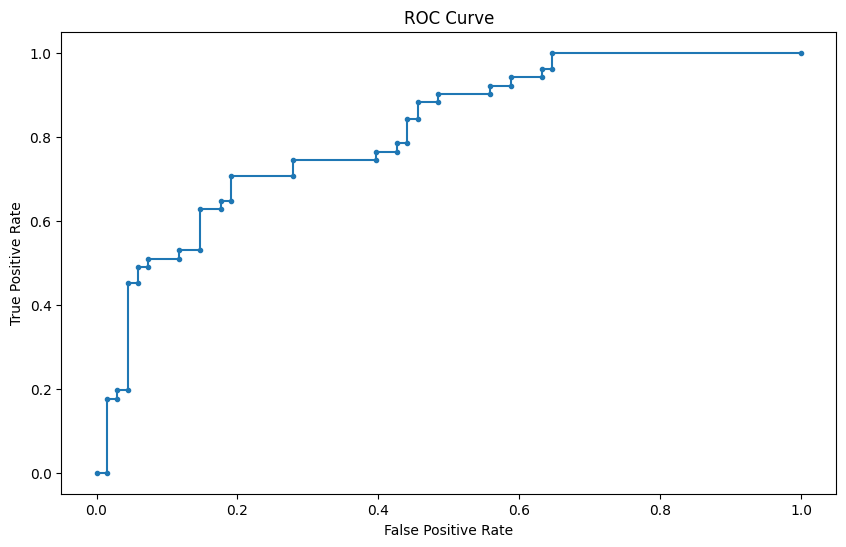

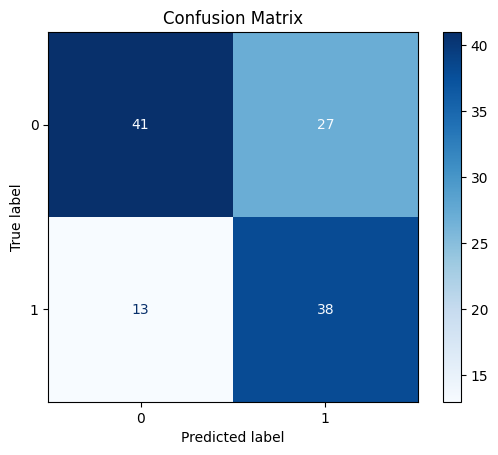

In [80]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

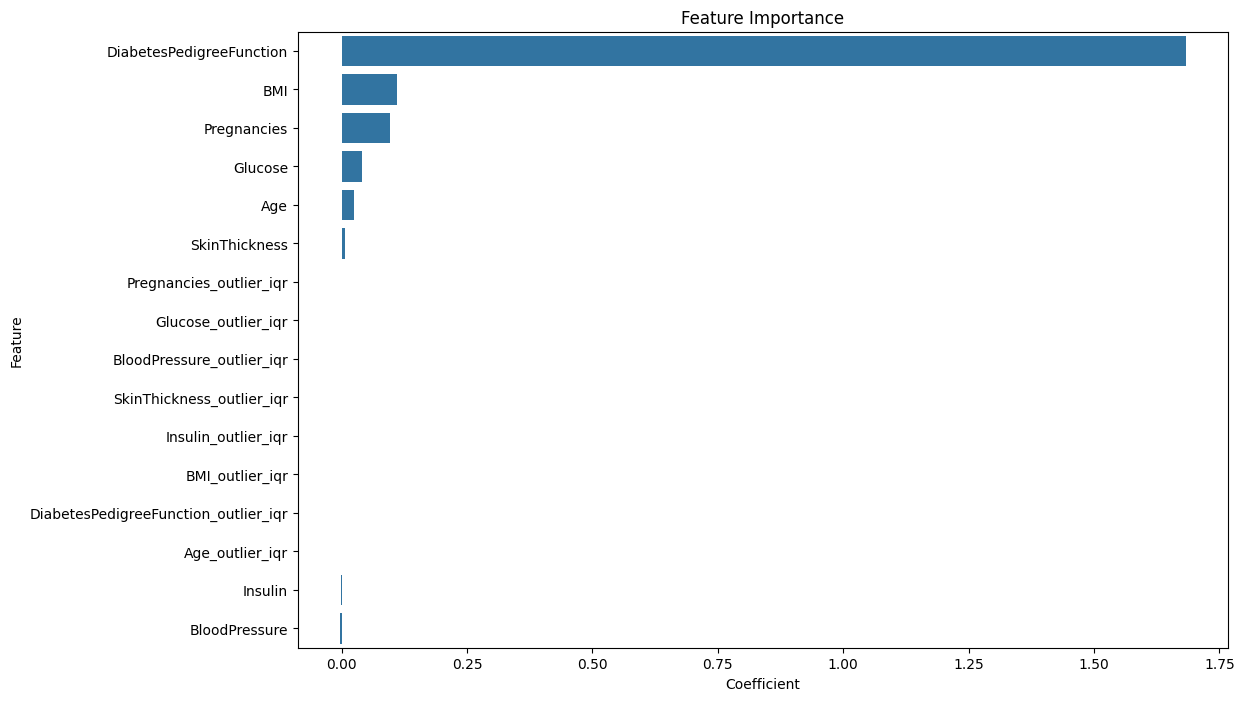

In [83]:
# Feature Importance
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


